In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob, os
import functools
sns.set_context('talk')

In [21]:
data_dir = '/raid/c-cuesta/tpcfs/'
snapshot = 11

In [3]:
# Load real space tpcf
list_dictionaries = []
os.chdir(data_dir + 'real/')
for real_tpcf in glob.glob("*.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [4]:
tpcfs = [dictionary['tpcf'] for dictionary in list_dictionaries]
mean_tpcf = np.mean(tpcfs, axis=0)
std_tpcf = np.std(tpcfs, axis=0)

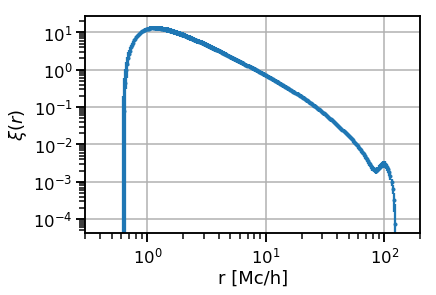

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(list_dictionaries[0]['r'],
            mean_tpcf, yerr = std_tpcf,
           marker = 'o', markersize = 3,
           linestyle='')
ax.set_xlabel("r [Mc/h]")
ax.set_ylabel(r"$\xi (r)$")
plt.grid()


In [22]:
# Load reshift space tpcf
list_dictionaries = []
os.chdir(data_dir + 'redshift/')
for real_tpcf in glob.glob(f"box???_s{snapshot:03d}.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [87]:
# Load reshift space tpcf
list_dictionaries_res2 = []
os.chdir(data_dir + 'redshift/')
for real_tpcf in glob.glob("box???_res2_*.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries_res2.append(pickle.load(input_file))

In [88]:
monopoles = [dictionary['mono'] for dictionary in list_dictionaries]
mean_mono = np.mean(monopoles, axis=0)
std_mono = np.std(monopoles, axis=0)

monopoles_res2 = [dictionary['mono'] for dictionary in list_dictionaries_res2]
mean_mono_res2 = np.mean(monopoles_res2, axis=0)
std_mono_res2 = np.std(monopoles_res2, axis=0)

reduce_mean = np.add.reduceat(mean_mono_res2, np.arange(0, 21, 2))[:-1]/2.
average_mono_res2 = np.concatenate((reduce_mean, mean_mono_res2[20:]))


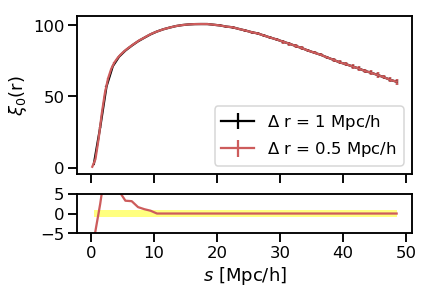

In [94]:

fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_mono,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_mono,
            label = r'$\Delta$ r = 1 Mpc/h', color = 'black')


ax1.errorbar(list_dictionaries_res2[0]['r'], 
    list_dictionaries_res2[0]['r'] * list_dictionaries_res2[0]['r'] *mean_mono_res2,
    yerr = list_dictionaries_res2[0]['r']*list_dictionaries_res2[0]['r']*std_mono_res2,
            label = r'$\Delta$ r = 0.5 Mpc/h', color = 'indianred')


ax2.plot(list_dictionaries[0]['r'], 
        (average_mono_res2 - mean_mono)/std_mono,
        color = 'indianred')
ax2.fill_between(list_dictionaries[0]['r'],-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)
ax2.set_xlabel(r'$s$ [Mpc/h]')
ax1.set_ylabel(r'$\xi_0 $(r)')
ax1.legend()

In [90]:
quadrupoles = [dictionary['quad'] for dictionary in list_dictionaries]
mean_quad = np.mean(quadrupoles, axis=0)
std_quad = np.std(quadrupoles, axis=0)

quadrupoles_res2 = [dictionary['quad'] for dictionary in list_dictionaries_res2]
mean_quad_res2 = np.mean(quadrupoles_res2, axis=0)
std_quad_res2 = np.std(quadrupoles_res2, axis=0)

reduce_mean = np.add.reduceat(mean_quad_res2, np.arange(0, 21, 2))[:-1]/2.
average_quad_res2 = np.concatenate((reduce_mean, mean_quad_res2[20:]))

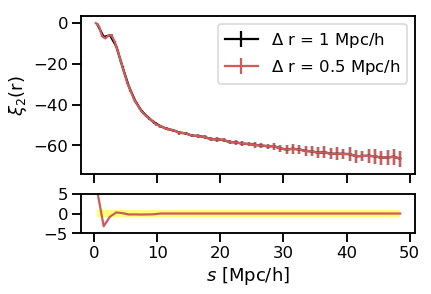

In [95]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_quad,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_quad,
            label = r'$\Delta$ r = 1 Mpc/h', color = 'black')


ax1.errorbar(list_dictionaries_res2[0]['r'], 
    list_dictionaries_res2[0]['r'] * list_dictionaries_res2[0]['r'] *mean_quad_res2,
    yerr = list_dictionaries_res2[0]['r']*list_dictionaries_res2[0]['r']*std_quad_res2,
            label = r'$\Delta$ r = 0.5 Mpc/h', color = 'indianred')


ax2.plot(list_dictionaries[0]['r'], 
        (average_quad_res2 - mean_quad)/std_quad,
        color = 'indianred')
ax2.fill_between(list_dictionaries[0]['r'],-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)
ax2.set_xlabel(r'$s$ [Mpc/h]')
ax1.set_ylabel(r'$\xi_2 $(r)')
ax1.legend()

In [92]:
hexadecapoles = [dictionary['hexa'] for dictionary in list_dictionaries]
mean_hexa = np.mean(hexadecapoles, axis=0)
std_hexa = np.std(hexadecapoles, axis=0)

hexa_res2 = [dictionary['hexa'] for dictionary in list_dictionaries_res2]
mean_hexa_res2 = np.mean(hexa_res2, axis=0)
std_hexa_res2 = np.std(hexa_res2, axis=0)

reduce_mean = np.add.reduceat(mean_hexa_res2, np.arange(0, 21, 2))[:-1]/2.
average_hexa_res2 = np.concatenate((reduce_mean, mean_hexa_res2[20:]))

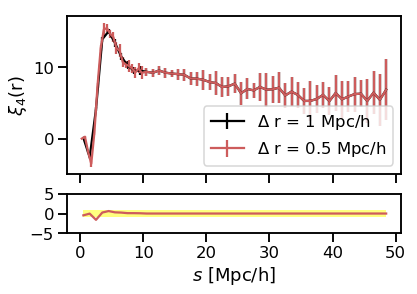

In [96]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_hexa,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_hexa,
            label = r'$\Delta$ r = 1 Mpc/h', color = 'black')


ax1.errorbar(list_dictionaries_res2[0]['r'], 
    list_dictionaries_res2[0]['r'] * list_dictionaries_res2[0]['r'] *mean_hexa_res2,
    yerr = list_dictionaries_res2[0]['r']*list_dictionaries_res2[0]['r']*std_hexa_res2,
            label = r'$\Delta$ r = 0.5 Mpc/h', color = 'indianred')


ax2.plot(list_dictionaries[0]['r'], 
        (average_hexa_res2 - mean_hexa)/std_hexa,
        color = 'indianred')
ax2.fill_between(list_dictionaries[0]['r'],-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)
ax2.set_xlabel(r'$s$ [Mpc/h]')
ax1.set_ylabel(r'$\xi_4 $(r)')
ax1.legend()

In [10]:
pi_sigmas = [dictionary['pi_sigma'] for dictionary in list_dictionaries]
mean_pi_sigma = np.mean(pi_sigmas, axis=0)

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


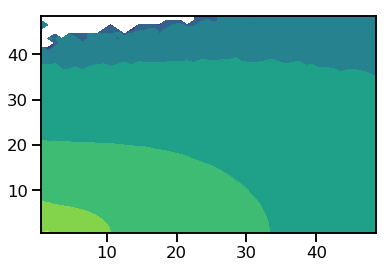

In [11]:
plt.contourf(list_dictionaries[0]['r'], 
            list_dictionaries[0]['r'], np.log10(mean_pi_sigma).T)